In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [5]:
model=tf.keras.models.load_model('./Models/object_detection(sgd).h5')

We normalized the labels using height and width in model building so to denormalize our labels we need those values

In [6]:
test_image_path='./Testimage.jpg'
test_image_actual=load_img(test_image_path)
test_image_actual_array=np.array(test_image_actual)
height,width,depth=test_image_actual_array.shape
height,width,depth

(400, 642, 3)

Our model can take only 224*224 size images so reshaping the image accordingly

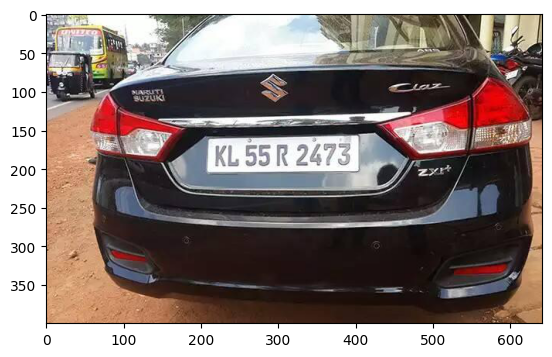

In [7]:
plt.imshow(test_image_actual)

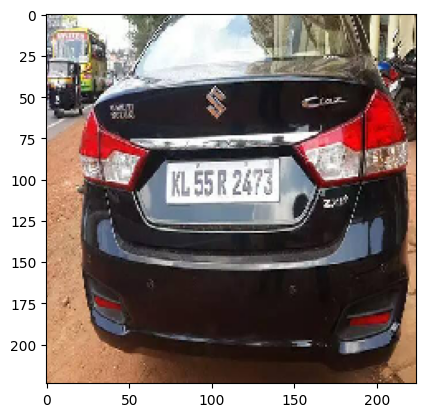

In [8]:
test_image_reshape=load_img(test_image_path,target_size=(224,224))
plt.imshow(test_image_reshape)

We normalized the image pixels while training. so performing the same

In [9]:
test_image_array=img_to_array(test_image_reshape)/255
test_image_array

array([[[0.9529412 , 0.9647059 , 0.9372549 ],
        [0.87058824, 0.88235295, 0.85490197],
        [0.96862745, 0.9764706 , 0.95686275],
        ...,
        [0.85882354, 0.8039216 , 0.6666667 ],
        [0.8901961 , 0.83137256, 0.7019608 ],
        [0.29411766, 0.21568628, 0.07058824]],

       [[0.9843137 , 0.99215686, 0.98039216],
        [0.6117647 , 0.61960787, 0.60784316],
        [0.89411765, 0.9019608 , 0.8901961 ],
        ...,
        [0.85490197, 0.8       , 0.6627451 ],
        [0.8980392 , 0.8392157 , 0.70980394],
        [0.3647059 , 0.28627452, 0.14117648]],

       [[0.73333335, 0.73333335, 0.7647059 ],
        [0.6       , 0.6039216 , 0.62352943],
        [0.89411765, 0.8980392 , 0.9137255 ],
        ...,
        [0.84313726, 0.7882353 , 0.6509804 ],
        [0.9137255 , 0.85490197, 0.7254902 ],
        [0.54901963, 0.47843137, 0.3372549 ]],

       ...,

       [[0.7764706 , 0.53333336, 0.37254903],
        [0.8235294 , 0.5803922 , 0.41960785],
        [0.85490197, 0

In [10]:
test_image_array.shape

(224, 224, 3)

**Predicting the plate co-ordinates**

To pass the test image to model we should specify the number of images. In this case it is 1.

In [11]:
test_image_array=test_image_array.reshape(1,224,224,3)
test_image_array.shape

(1, 224, 224, 3)

In [12]:
co_ordinates=model.predict(test_image_array)
co_ordinates

1/1 [==============================] - 2s 2s/step


array([[0.3341171 , 0.62516207, 0.40994927, 0.5176244 ]], dtype=float32)

While training the labels of the number plate were normalized with height and width
that is labels of x (xmin and xmax) was divided by width and labels of y (ymin and ymax) were divided by height
so now to get them we to multiply with width and height (denormalize)

In [13]:
denormalized_coord=co_ordinates*np.array([width,width,height,height])
denormalized_coord

array([[214.50318754, 401.35404575, 163.97970915, 207.04975128]])

We need to make it as integer so that we can locate the number plate

In [14]:
denormalized_coord=denormalized_coord.astype(np.int64)
denormalized_coord

array([[214, 401, 163, 207]])

**Getting the bounding box of number plate from the above co ordinates**

xmin,xmax,ymin,ymax=denormalized_coord
cv2.rectangle(test_image_actual,(xmin,ymin),(xmax,ymax),(255,0,0),3)

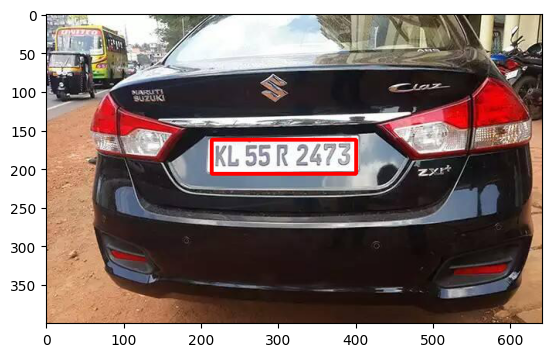

In [15]:
xmin,xmax,ymin,ymax=denormalized_coord[0]
cv2.rectangle(test_image_actual_array,(xmin,ymin),(xmax,ymax),(255,0,0),3)
plt.imshow(test_image_actual_array)

Combining all the above to create a pipeline which gives an image with bounding box of number plate

In [16]:
def object_detection(test_image_path):
    test_image_actual=load_img(test_image_path)
    test_image_actual_array=np.array(test_image_actual)
    height,width,depth=test_image_actual_array.shape 
    test_image_reshape=load_img(test_image_path,target_size=(224,224))
    test_image_array=img_to_array(test_image_reshape)/255
    test_image_array=test_image_array.reshape(1,224,224,3)
    co_ordinates=model.predict(test_image_array)
    denormalized_coord=co_ordinates*np.array([width,width,height,height])
    denormalized_coord=denormalized_coord.astype(np.int64)
    xmin,xmax,ymin,ymax=denormalized_coord[0]
    cv2.rectangle(test_image_actual_array,(xmin,ymin),(xmax,ymax),(255,0,0),3)
    return test_image_actual_array,denormalized_coord[0]


In [17]:
test_image_path='./Testimage.jpg'
image,coordinates=object_detection(test_image_path)

1/1 [==============================] - 0s 187ms/step


[214 401 163 207]


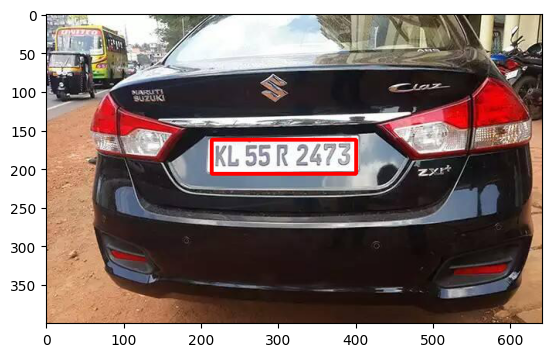

In [18]:
plt.imshow(image)
print(coordinates)
xmin,xmax,ymin,ymax=coordinates

In [19]:
image_array=np.array(image)
number_plate=image_array[ymin:ymax+1,xmin:xmax+1]

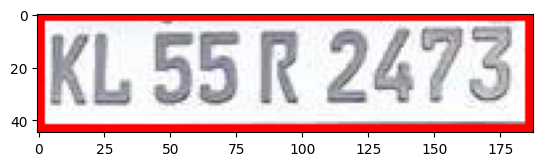

In [20]:
plt.imshow(number_plate)

In [21]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [24]:
import easyocr
reader = easyocr.Reader(['en'])  
result = reader.readtext(number_plate)
print(result)


[([[1, 0], [187, 0], [187, 41], [1, 41]], 'RL 55R 2473', 0.8521534439335734)]


In [25]:
print("Detected Car number is ",result[0][-2])

Detected Car number is  RL 55R 2473
